In [19]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport ## не использовать

In [20]:
colnames=['symboling', 'normalized-losses', 'company', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
         'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
          'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 
          'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'] 

# normalized-losses - payment per insured vehicle year
# curb-weight - the weight of the vehicle including a full tank of fuel and all standard equipment
# bore - the diameter of each cylinder
# stroke - a phase of the engine's cycle
# compression-ratio - the ratio of the volume of the cylinder and its head space
# peak-rpm - max revolutions per minute (обороты в минуту)
# city-mpg - miles per gallon = 2,352 * km per liter

In [21]:
# reading the data

data = pd.read_csv("./DATA1/imports-85.data", sep=',', names=colnames, header=None)
for i in colnames:
    data.loc[data[i] == '?', i] = np.nan
del data['symboling']


In [22]:
# remove restrictions from the table

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [23]:
# changing mpg to km/l
data[['city-mpg']] = round(data[['city-mpg']] / 2.352, 2)
data[['highway-mpg']] = round(data[['highway-mpg']] / 2.352, 2)
data.rename(columns={'city-mpg': 'city-km/l'}, inplace = True)
data.rename(columns={'highway-mpg': 'highway-km/l'}, inplace = True)
data['horsepower'] = pd.to_numeric(data['horsepower'])
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'])

# 1985 Auto Imports Database

In [24]:
data.head()

,normalized-losses,company,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-km/l,highway-km/l,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,8.93,11.48,13495
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,8.93,11.48,16500
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,8.08,11.05,16500
3,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,10.20,12.76,13950
4,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,7.65,9.35,17450


# Price Dataset (mean)
There we can see that most of prices of cars are between 5000 and 13000 **usd**
But there are also some expensive cars with the price more than 30000 **usd**

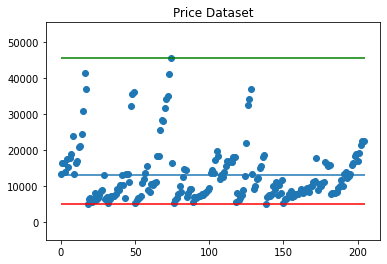

In [25]:
# Scatter plot of mean of price

data['price'] = data1 = data['price'].fillna(data['price'][0]).astype('int64')
mean = data['price'].fillna(data['price'][0]).astype('int64').mean()

min_value = min(data1)
max_value = max(data1)

plt.title("Price Dataset")
plt.ylim(min_value - 10000, max_value + 10000)
plt.scatter(x=data.index, y=data['price'])
plt.hlines(y=mean, xmin=0, xmax=len(data1)) # average

plt.hlines(y=min(data1), xmin=0, xmax=len(data), colors='r') # lowest
plt.hlines(y=max(data1), xmin=0, xmax=len(data), colors='g') # highest

plt.show()


# Mean of wheel base for drive wheels
There we can see, that the biggest average size of wheels is on Rear-wheel drive cars
The size of Four-wheel drive cars' wheels are approximately the same as for Front-wheel drive cars

In [26]:
# lets calculate mean of wheel-base for drive-wheels

data.pivot_table(index=["drive-wheels"], values = ['wheel-base'], aggfunc = 'mean')

,wheel-base
drive-wheels,
4wd,96.822222
fwd,96.429167
rwd,102.660526


# Mean of horsepower, peak-rpm, city-km/l and highway-km/l for engine-type
Firstly, we can see that engine type named "dohcv" has the highest horsepower, so it is good for racing

Secondly, even though engine type named "ohc" has the lowest horsepower (average 93,7), it has the highest city and highway km/l, which provides less spending on oil, so it is good as a family car.

Engine named 'dohc' has almost the same stats as 'dohcv' has, but 'dohc's' average horsepower is twice less.

Talking about other engines: their stats are pretty the same as in those which I described before.

In [27]:
# lets calculate mean of horsepower, city-km/l and highway-km/l for engine-type

data.pivot_table(index=["engine-type"], values = ['horsepower', 'city-km/l', 'highway-km/l'], \
                 aggfunc = 'mean', fill_value = 0).round(2)

,city-km/l,highway-km/l,horsepower
engine-type,,,
dohc,8.50,10.56,146.00
dohcv,7.23,11.90,288.00
l,10.42,12.26,95.50
ohc,11.40,13.85,93.70
ohcf,10.40,12.59,110.40
ohcv,7.13,9.03,169.54
rotor,7.12,9.78,109.50


# Medians of length, width, height and curb-weight

There we can see, that:
    1) Hardtop has the biggest average curb weight.
    2) Wagon is the highest body style of the cat.
    3) Also Wagon is the longest car on average.
    4) And Sedan has the widest body style of the car.
That means, convertible and hatchback are the most comfortable cars for cities, while it is more convenient to ride to a countryside on wagon, because of it's height.

In [28]:
# Medians of length, width, height and curb-weight

d = {'length': data['length'].median(), 
     'width': data['width'].median(),
     'height': data['height'].median(),
     'curb-weight': data['curb-weight'].median()}
print('   MEDIANs')
for i in range(len(d)):
    print(list(d.keys())[i],':', list(d.values())[i])
print('\n\n')
# Medians compared to body-style

print(data.pivot_table(index=["body-style"], values = ['length', 'width', 'height', 'curb-weight'], \
                 aggfunc = 'median', fill_value = 0))

   MEDIANs
length : 173.2
width : 65.5
height : 54.1
curb-weight : 2414.0



             curb-weight  height  length  width
body-style                                     
convertible       2674.0    51.2  168.85  64.60
hardtop           2717.5    52.0  176.20  65.60
hatchback         2294.5    52.0  168.70  65.20
sedan             2410.0    54.5  175.60  65.75
wagon             2650.0    57.5  181.50  66.50


# Standard deviation of price and normalized-losses	for different companies' cars

1) BMW has the biggest std prices among all the companies, that means BMW has lots of different prices to allow every people buy their car. And the smallest normalized-losses, which means that normalized-losses are almost the same on every car they produce.
2) Mercedes-benz, Nissan, Plymouth, Saab, Toyota and Volkswagen have the biggest normalized-losses (more than $20)
That means, their cars require different amount of money per month.

In [29]:
data.pivot_table(index=["company"], values = ['price', 'normalized-losses'], \
                 aggfunc = 'std', fill_value = 0).replace(0, 'undefined', regex=True)

,price
company,
alfa-romero,1734.937559
audi,3557.145893
bmw,9263.832033
chevrolet,754.421633
dodge,2213.386044
honda,2061.672112
isuzu,3164.872127
jaguar,2047.559523
mazda,3975.682094


# Sedan is the most popular body style of the car in 1985

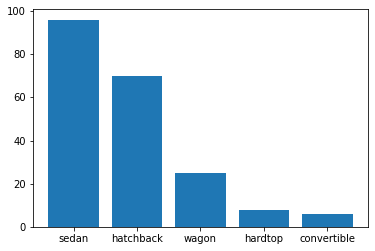

In [30]:
# body_style information

body_style = data['body-style'].value_counts().to_dict()

plt.bar(range(len(body_style)), body_style.values(), align = 'center')
plt.xticks(range(len(body_style)), body_style.keys()) 
# plt.savefig("body_style.png")
plt.show()

<AxesSubplot:>

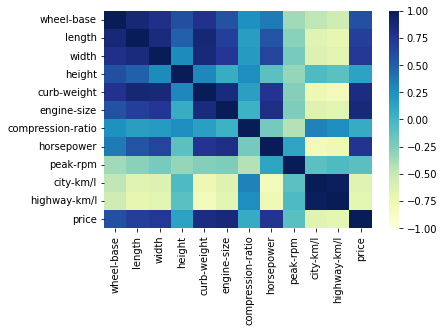

In [31]:
# correlation between a pair of features

sns.heatmap(data.iloc[:].corr(), vmin = -1, vmax = 1, cmap="YlGnBu")

# data.iloc[:].corr()
# sns.heatmap(data.iloc[:].corr(), center = 0, vmin = -1, vmax = 1, annot = True, linewidths=.5, cmap="YlGnBu")
# sns.clustermap(data.iloc[:].corr(), vmin = -1, vmax = 1)

# normalized-losses information
BMW has the biggest normalized-losses and the lowest normalized-losses std, that means, all of BWM's cars has very high normalized-losses, no metter how cheap was your car, you will spend the same amount of money as other owners of BWM per month.

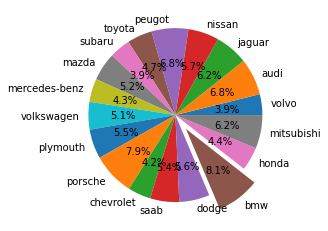

In [32]:
# normalized-losses information

data.dropna(subset = ['normalized-losses'], inplace = True)
data[['normalized-losses']] = data[['normalized-losses']].astype('int64')

d = dict()

for i in set(data['company']): # making dictionary without values
    d[i] = 0
for j in range(len(data['company'])): # adding values to the dictionary
    d[list(data['company'])[j]] += list(data['normalized-losses'])[j]
for k in d.values(): # fingind average of values
    d[list(d.keys())[list(d.values()).index(k)]] //= list(data['company']).count(list(d.keys())[list(d.values()).index(k)])

myexplode = [0.2 if i == max(d.values()) else i * 0 for i in d.values()]

plt.pie(d.values(), labels=d.keys(), explode = myexplode, autopct='%1.1f%%')
# plt.savefig("normalized_losses.png")
plt.show()

In [33]:
# rereading the data bc we deleted NaN rows for normalized-losses column

data = pd.read_csv("./DATA1/imports-85.data", sep=',', names=colnames, header=None)
for i in colnames:
    data.loc[data[i] == '?', i] = np.nan
# data

# engine aspiration compared to engine type
'OHC' was the most popular engine type in 1985. And Std was the most popular engine's aspiration in 1985.

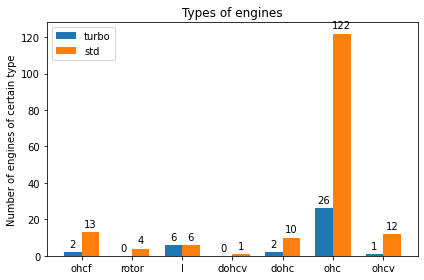

In [34]:
# engine aspiration compared to engine type

labels = list(set(data['engine-type']))

first_lable, second_lable = list(set(data['aspiration']))[0], list(set(data['aspiration']))[1] # turbo, std
turbo, std = [], []
d = dict()
for j in set(data['engine-type']):
    d[j] = [0, 0]
for i in range(len(data['engine-type'])):
    if list(data['aspiration'])[i] == 'turbo':
        ind = 0
    else: ind = 1
    d[list(data['engine-type'])[i]][ind] += 1
for i in d.values():
    turbo.append(i[0])
    std.append(i[1])

x = np.arange(len(set(data['engine-type'])))  # the location of the lable
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, turbo, width, label = first_lable)
rects2 = ax.bar(x + width/2, std, width, label = second_lable)

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of engines of certain type')
ax.set_title('Types of engines')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

# plt.savefig("engine.png")
plt.show()

# The correlation between horsepower and bore

In [35]:
data['horsepower'] = pd.to_numeric(data['horsepower'])
data['bore'] = pd.to_numeric(data['bore'])

Text(0, 0.5, 'Horsepower')

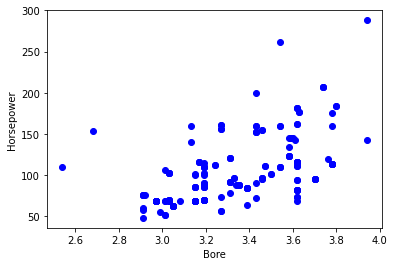

In [36]:
plt.plot(data.bore, data.horsepower, 'bo')
plt.rcParams['figure.figsize'] = 11, 7
plt.xlabel('Bore')
plt.ylabel('Horsepower')